<table>
    <tr>
      <td>Bases de datos NoSQL (<b>NSQ</b>) - Facultad de Informática - UCM</td>
      <td><img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/></td>
    </tr>
</table>

# Caso de uso: Cálculo de palabras malsonantes de Xokas 
## Análisis y trackeo de opiniones.
### Pablo C. Cañizares

En este caso de uso presentamos un análisis de las palabras expresadas por la figura pública, el Xokas, en un vídeo de [Youtube](https://www.youtube.com/watch?v=FCTlOvRn38I&pp=ygUOeG9rYXMgZW5mYWRhZG8%3D). 

El objetivo es calcular el número de palabras malsonantes por segundo, aunque podría ser cualquier otro tipo de analisis. Los pasos a dar son:

- Cargar el fichero xokas.srt que encontraréis en el campus.
- Procesarlo y crear tres listas con: los tiempos de inicio, final y el texto. Cambiar a fecha las columnas apropiadas
- Crear una nueva columna duración
- Proporcionar una lista de palabras malsonantes
- Crear una nueva columa donde aparezcan el número de palabras malsonantes por fila.
- Calcular otras estadísticas como: total palabras, total palabras malsonantes, porcentaje de malsonantes.


## Un apunte más ...

PD: Tu shhh, callao, y a sacar datos.

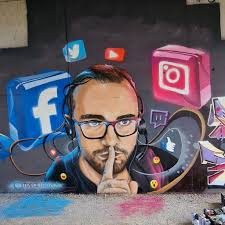

## Código

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Pasos a realizar:

# Leer el archivo SRT
file_path = 'xokas.srt'
with open(file_path, 'r', encoding='utf-8') as file:
    srt_content = file.readlines()

# Haz una función processLines, que permita procesar las líneas leídas, y obtener 3 listas diferentes: start_times, end_times, text_lines 
#def processLines(srt_content):
tam = len(srt_content)
start_times = []
end_times = []
text_lines = []
for i in range (tam//4):
    x = i*4
    times = srt_content[x+1]
    times = times.replace('\n', '')
    times2 = times.split(" --> ")
    start_times.append(times2[0])
    end_times.append(times2[1])
    text_lines.append(srt_content[x+2])
    

In [ ]:
# Crear un DataFrame con las columnas seleccionadas: start_times, end_times, text_lines 
starts = pd.Series(start_times, name = 'starts')
ends = pd.Series(end_times, name = 'ends')
texts = pd.Series(text_lines, name = 'texts')

df = pd.DataFrame({'starts': starts, 'ends': ends, 'texts': texts})

# Crea una función llamada calculateduration(row), que calcule la duracion dada una fila del dataframe:
#  Pista 1: datetime.strptime(row['nombre_columna'], "%H:%M:%S,%f") convierte el valor a fecha, y con ello se pueden hacer operaciones con fechas. 
#  Pista 2: Para aplicar una función a un dataframe y crear una columna  se puede utilizar esta instrucción'df['nueva_columna'] = df.apply(calculate_duration, axis=1)

tam2 = len(start_times)
calculate_duration = []
for i in range (tam2):
    row = df.iloc[i]
    date1 = datetime.strptime(row['starts'], "%H:%M:%S,%f")
    date2 = datetime.strptime(row['ends'], "%H:%M:%S,%f")
    calculated = date2 - date1
    calculate_duration.append(calculated)

calculate_duration = pd.Series(calculate_duration, name='duration')
df['duration'] = calculate_duration
df

# Crea una lista de palabras malsonantes
#malsonantes = [ ... ]

# Contar palabras malsonantes por segmento: crea una funcion 'count_malsonantes(text, list):' que dada una lista y una palabra, cuente el número de apariciones.

# Ahora crea la función 'count_malsonantes(df, malsonantes_list):' que itere un dataframe y vaya tomando la columna texto e itere sobre la funcion anterior


In [17]:

# Calcular la tasa de palabras malsonantes por segundo
df['malsonantes_per_second'] = df.apply(
    lambda row: row['malsonantes_count'] / row['duration'] if row['duration'] > 0 else 0, axis=1
)

# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['malsonantes_per_second'], color='red', alpha=0.75)
plt.title('Tasa de Palabras Malsonantes por Segundo')
plt.xlabel('Segmentos de Tiempo')
plt.ylabel('Palabras Malsonantes por Segundo')
plt.grid(axis='y')
plt.show()

# Mostrar el DataFrame procesado
print(df.head())

# Calcular estadísticas generales
total_palabras = df['text'].apply(lambda x: len(x.split())).sum()  # Total de palabras en el texto
total_malsonantes = df['malsonantes_count'].sum()  # Total de palabras malsonantes
porcentaje_malsonantes = (total_malsonantes / total_palabras) * 100 if total_palabras > 0 else 0  # Porcentaje


print()
print("===== Estadísticas Generales =====")
print(f"Total de palabras en el texto: {total_palabras}")
print(f"Total de palabras malsonantes: {total_malsonantes}")
print(f"Porcentaje de palabras malsonantes: {porcentaje_malsonantes:.2f}%")
print("===================================")

...

# Mostrar el conteo de palabras malsonantes
print("\n===== Conteo de Palabras Malsonantes =====")
for palabra, cantidad in malsonantes_totales.items():
    print(f"{palabra}: {cantidad}")
print("===================================")

NameError: name 'df' is not defined